# Alpha Diversity Calculation

In [1]:
#install the necessary packages
import numpy as np
import pandas as pd
from scipy.stats import entropy

In [2]:
dataframe = pd.read_csv('alpha_diversity_input.csv')  #read in the datafile for alpha diversity calculations. samples are rows, metabolite features are columns

In [3]:
#covert every column from float to object
for col in dataframe.columns:
    if dataframe[col].dtype == 'float64':
        dataframe[col] = dataframe[col].astype(object)
    if dataframe[col].dtype == 'int64':
        dataframe[col] = dataframe[col].astype(object)

In [4]:
print(dataframe.dtypes)

Unnamed: 0           object
263.237_16.3_1047    object
496.34_12.7_543      object
263.237_16.2_2535    object
790.379_10.2_2433    object
                      ...  
305.248_16.1_3436    object
682.597_21.2_3740    object
1148.934_6.8_5472    object
632.432_14.3_4854    object
810.601_19.8_1387    object
Length: 3383, dtype: object


In [5]:
dataframe_drop = dataframe.drop(columns=['Unnamed: 0'])

In [6]:
#define a function for shannon diversity
#shannon
def shannon_diversity(counts):
    """Shannon entropy."""      #Shannon index cares more about species richness
    # Ensure counts are in numeric format (np.array)
    counts = np.array(counts, dtype=float)
    return entropy(counts, base=2) #with a base=2 this represents info in binary terms and is used in ecological studies

    


# 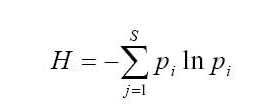

In [8]:
#calculate alpha diversity

alpha_results = [] #creating a dictionary to store
for idx, row in dataframe_drop.iterrows():
    shannon = shannon_diversity(row)
    alpha_results.append([shannon])

In [10]:
#results to dataframe

alphadv_results_df = pd.DataFrame(alpha_results, columns=['shannon'])

print(alphadv_results_df)

     shannon
0   6.414398
1   8.312278
2   8.120159
3   7.452064
4   7.065793
5   7.090445
6   7.779784
7   8.176036
8   7.672488
9   8.063859
10  8.005473
11  8.352364
12  7.868968
13  8.322081
14  8.030831


In [17]:
alphadv_results_df.to_csv('alphadv_results.csv') #convert dataframe to .csv file. writes to your working directory

In [ ]:
#solutions to errors for alpha diversity

#type error: can't multipy sequence by non-int of type 'float'--- solution https://www.freecodecamp.org/news/typeerror-cant-multiply-sequence-by-non-int-of-type-float-solved-python-error/

#convert floats to objects
#floats are numbers with decimal points
#https://www.geeksforgeeks.org/how-to-convert-floats-to-strings-in-pandas-dataframe/
    